In [32]:
import tensorflow as tf
import os
import cv2
import imghdr

DatasetDir = 'Dataset'

ImageExts = ['jpeg', 'jpg', 'bmp', 'png']

for ImageClass in os.listdir(DatasetDir): 
    for Image in os.listdir(os.path.join(DatasetDir, ImageClass)):
        ImagePath = os.path.join(DatasetDir, ImageClass, Image)
        try: 
            Img = cv2.imread(ImagePath)
            ImgExt = imghdr.what(ImagePath)
            if ImgExt not in ImageExts:
                print(f'This image is going to be deleted because it\'s extension is not compatible : {ImagePath}')
                os.remove(ImagePath)
        except Exception as e:
            print(f'Issue with image {ImagePath}')

Found 4829 files belonging to 2 classes.


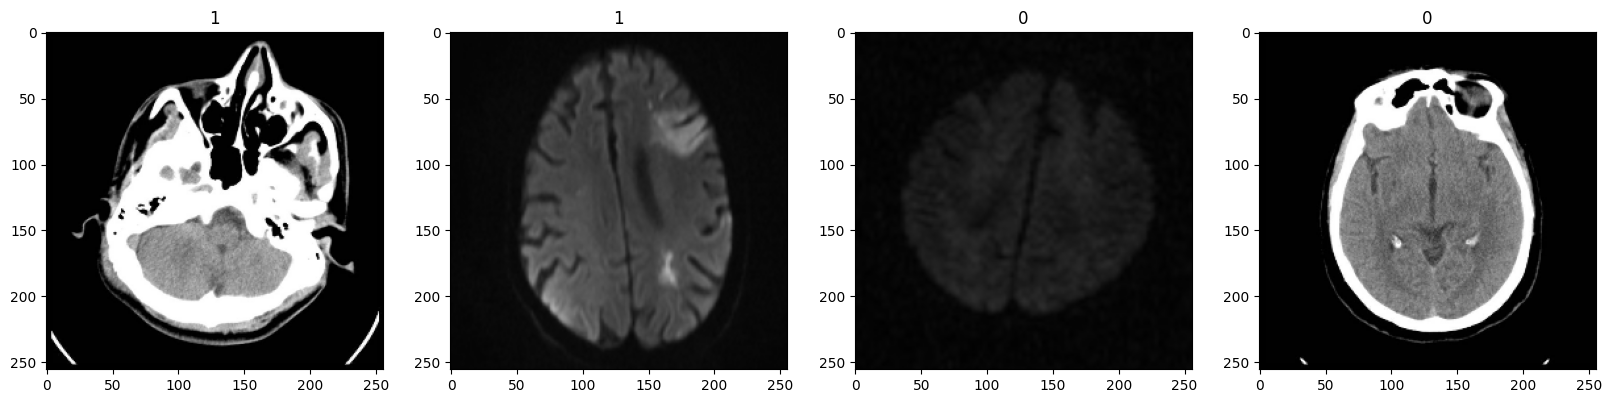

In [33]:
import numpy as np
from matplotlib import pyplot as plt

Data = tf.keras.utils.image_dataset_from_directory('Dataset').map(lambda x,y: (x/255, y))

DataIterator = Data.as_numpy_iterator()

Batch = DataIterator.next()

Fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(Batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(Batch[1][idx])

In [34]:
training_size = int(len(Data)*.7)
validation_size = int(len(Data)*.2)+1
testing_size = int(len(Data)*.1)

print(f"training_size={training_size}")
print(f"validation_size={validation_size}")
print(f"testing_size={testing_size}")

training_size=105
validation_size=31
testing_size=15


In [35]:
TrainingData = Data.take(training_size)
ValidationData = Data.skip(training_size).take(validation_size)
TestingData = Data.skip(training_size+validation_size).take(testing_size)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Initialize the model
Model = Sequential()

# Scale 1 (First block)
Model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)))  # First Conv layer with 32 filters
Model.add(MaxPooling2D())  # MaxPooling to reduce spatial dimensions
Model.add(Dropout(0.25))  # Dropout to prevent overfitting

# Scale 2 (Second block)
Model.add(Conv2D(64, (3,3), activation='relu'))  # Second Conv layer with 64 filters
Model.add(MaxPooling2D())  # MaxPooling to reduce spatial dimensions
Model.add(Dropout(0.25))  # Dropout to prevent overfitting

# Scale 3 (Third block)
Model.add(Conv2D(128, (3,3), activation='relu'))  # Third Conv layer with 128 filters
Model.add(MaxPooling2D())  # MaxPooling to reduce spatial dimensions
Model.add(Dropout(0.25))  # Dropout to prevent overfitting

# Scale 4 (Fourth block)
Model.add(Conv2D(256, (3,3), activation='relu'))  # Fourth Conv layer with 256 filters
Model.add(MaxPooling2D())  # MaxPooling to reduce spatial dimensions
Model.add(Dropout(0.25))  # Dropout to prevent overfitting

# Scale 5 (Fifth block)
Model.add(Conv2D(512, (3,3), activation='relu'))  # Fifth Conv layer with 512 filters
Model.add(MaxPooling2D())  # MaxPooling to reduce spatial dimensions
Model.add(Dropout(0.25))  # Dropout to prevent overfitting

# Flatten the output from Conv layers to feed into Dense layers
Model.add(Flatten())

# Fully Connected (Dense) Layers
Model.add(Dense(256, activation='relu'))  # Dense layer with 256 neurons
Model.add(Dropout(0.5))  # Dropout for regularization

# Output Layer
Model.add(Dense(1, activation='sigmoid'))  # Binary classification (1 output neuron)

# Compile the model
Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

# Display model summary
Model.summary()


c:\Users\Kathit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,287,681 (23.99 MB)

 Trainable params: 6,287,681 (23.99 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation setup
data_gen = ImageDataGenerator(
    rotation_range=20,         
    width_shift_range=0.2,     
    height_shift_range=0.2,    
    shear_range=0.2,           
    zoom_range=0.2,            
    horizontal_flip=True,      
    fill_mode='nearest',       
    rescale=1./255,            
    validation_split=0.2       # 20% data for validation
)

# Load training data with augmentation
augmented_training_data = data_gen.flow_from_directory(
    'Dataset',                 
    target_size=(256, 256),    
    batch_size=32,             
    class_mode='binary',       
    subset='training'          # Use 80% for training
)

# Load validation data without augmentation
validation_data = data_gen.flow_from_directory(
    'Dataset',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    subset='validation'        # Use 20% for validation
)

# TensorBoard callback
LogDir = 'logs'
Tensorboard_Callback = tf.keras.callbacks.TensorBoard(log_dir=LogDir)

# EarlyStopping to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with augmented data
History = Model.fit(
    augmented_training_data,
    epochs=75,
    validation_data=validation_data,
    callbacks=[Tensorboard_Callback, early_stop]
)


Found 3864 images belonging to 2 classes.
Found 965 images belonging to 2 classes.


c:\Users\Kathit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/75
121/121 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - accuracy: 0.5416 - loss: 0.8180 - val_accuracy: 0.4487 - val_loss: 0.6938
Epoch 2/75
121/121 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.5787 - loss: 0.6820 - val_accuracy: 0.4487 - val_loss: 0.6954
Epoch 3/75
121/121 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.6155 - loss: 0.6767 - val_accuracy: 0.4487 - val_loss: 0.7057
Epoch 4/75
121/121 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.6282 - loss: 0.6713 - val_accuracy: 0.4860 - val_loss: 0.7612
Epoch 5/75
121/121 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.6533 - loss: 0.6527 - val_accuracy: 0.4984 - val_loss: 0.7643
Epoch 6/75
121/121 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.6715 - loss: 0.6277 - val_accuracy: 0.4933 - val_loss: 0.8101
Epoch 7/75
121/121 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.6542 - loss: 0.6280 - val_accuracy: 0.5264 - val_loss: 0.7666
Epoch 8/75
121/121 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.6766 - loss: 0.6123 - val_accu

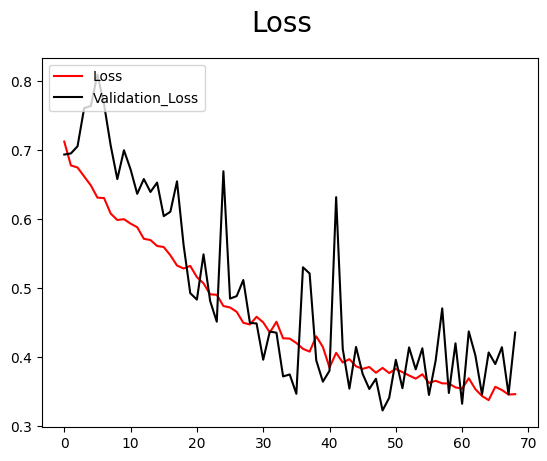

In [38]:
Fig = plt.figure()
plt.plot(History.history['loss'], color='red', label='Loss')
plt.plot(History.history['val_loss'], color='black', label='Validation_Loss')
Fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

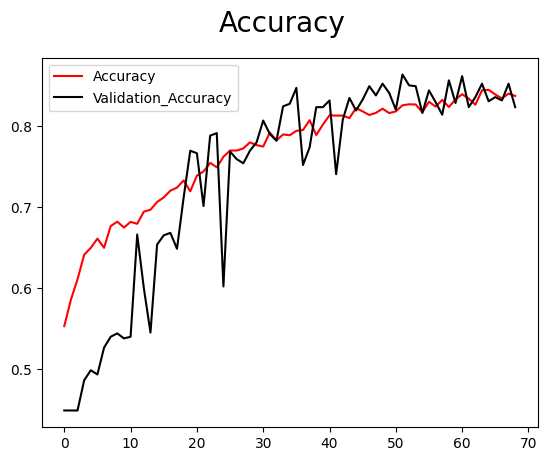

In [39]:
Fig = plt.figure()
plt.plot(History.history['accuracy'], color='red', label='Accuracy')
plt.plot(History.history['val_accuracy'], color='black', label='Validation_Accuracy')
Fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
Confusion Matrix:
[[232.  21.]
 [ 43. 181.]]


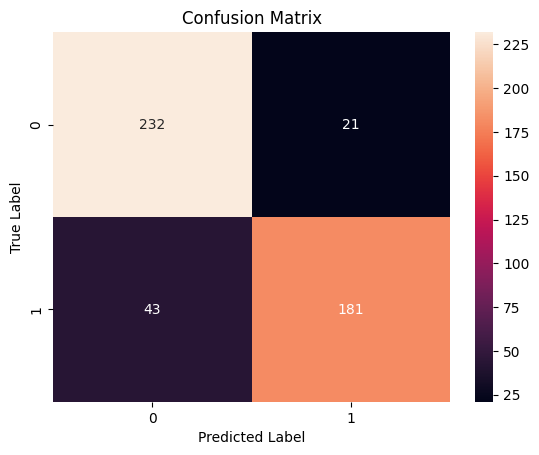

In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize metrics
Precision = Precision()
Recall = Recall()
Accuracy = BinaryAccuracy()

# Initialize confusion matrix (assuming binary classification)
cm = np.zeros((2, 2))  # Adjust dimensions for multi-class problems

for Batch in TestingData.as_numpy_iterator():
  X, y = Batch
  yhat = Model.predict(X)

  # Update metrics
  Precision.update_state(y, yhat)
  Recall.update_state(y, yhat)
  Accuracy.update_state(y, yhat)

  # Calculate and accumulate confusion matrix
  cm += confusion_matrix(y, yhat.round())  # Round predictions for binary classes

# After iterating through all batches:

# Get final values for metrics
precision = Precision.result().numpy()
recall = Recall.result().numpy()
accuracy = Accuracy.result().numpy()

# Print or visualize the confusion matrix
print("Confusion Matrix:")
print(cm)

# Assuming you have class labels for your data
class_labels = ["Normal", "Stroke"]  # Adjust labels accordingly

# Get integer values for counts in the confusion matrix
cm_int = cm.astype(int)  # Convert to integer type

# Create a heatmap with integer annotations
sns.heatmap(cm_int, annot=True, fmt="d")  # Use 'd' format for integers
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [41]:
print(f"Precision : {Precision.result()}, Recall : {Recall.result()}, Accuracy : {Accuracy.result()}")

Precision : 0.896039605140686, Recall : 0.8080357313156128, Accuracy : 0.8658280968666077


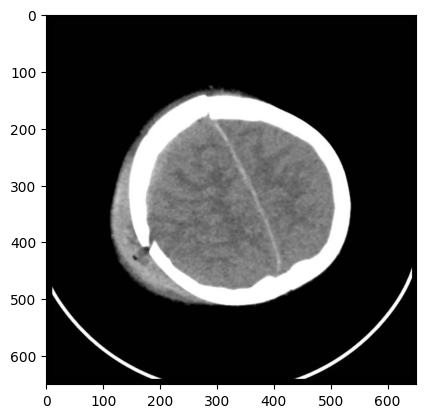

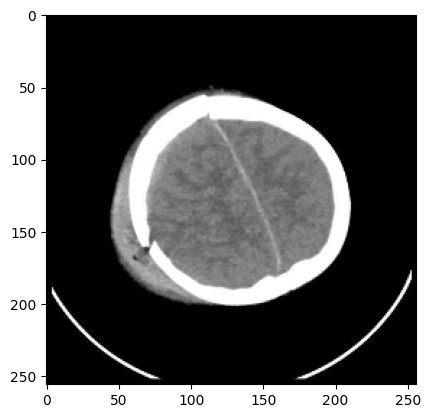

In [42]:
import cv2

Img = cv2.imread('Dataset/Normal/51 (42).jpg')
plt.imshow(Img)
plt.show()

ResizedImg = tf.image.resize(Img, (256,256))
plt.imshow(ResizedImg.numpy().astype(int))
plt.show()

In [43]:
yhat = Model.predict(np.expand_dims(ResizedImg/255, 0))

print(yhat)

if yhat > 0.5: 
    print(f'Predicted class is Stroke')
else:
    print(f'Predicted class is Normal')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.2729627]]
Predicted class is Normal


In [45]:
Model.save('trial_model_1.h5')